# Predictive Analytics dengan Dataset Loan Status Prediction - Andhar Siraj Munir

# Domain Proyek

## Latar Belakang


Prediksi Status Pinjaman menjadi penting karena membantu instansi keuangan, seperti bank, dalam pengambilan keputusan pinjaman. Dengan menggunakan model pembelajaran mesin, dapat memproses informasi dari pemohon seperti pendapatan, pendidikan, dan riwayat kredit untuk memprediksi kemungkinan persetujuan atau penolakan pinjaman. Hal ini memungkinkan efisiensi dan objektivitas dalam proses penilaian risiko kredit, meminimalkan potensi default, dan mendukung kebijakan peminjaman yang lebih cerdas. Selain itu, prediksi status pinjaman juga memberikan manfaat bagi calon peminjam, membantu mereka memahami peluang mereka untuk mendapatkan pinjaman sebelum mengajukan aplikasi, dan memberikan transparansi dalam keputusan kredit.

## Referensi

Artikel [An Approach For Prediction Of Loan Approval
Using Machine Learning Algorithm](https://ijcrt.org/papers/IJCRT2106313.pdf)

# Business Understanding

## Problem Statements

1. Proses penilaian kredit dalam pemberian pinjaman seringkali kompleks dan melibatkan banyak faktor.
2. Sistem prediksi secara manual yang kurang efektif dapat menyebabkan ketidakpastian dalam menentukan persetujuan atau penolakan pinjaman.

## Goals

Tujuan utama proyek ini adalah membangun Model Pembelajaran Mesin yang dapat memprediksi status persetujuan atau penolakan pinjaman berdasarkan faktor-faktor seperti pendapatan, pendidikan, dan riwayat kredit. Dengan adanya model ini, diharapkan dapat meningkatkan efisiensi proses pengambilan keputusan kredit dan mengurangi risiko default. Selain itu, tujuan lainnya adalah memberikan transparansi kepada calon peminjam mengenai peluang mereka untuk mendapatkan pinjaman, sehingga memperkuat kepercayaan dan meminimalkan ketidakpastian dalam proses aplikasi pinjaman.

## Solution statements

Dalam proses pengembangan model machine learning akan dilakukan beberapa percobaan:

1. Melatih dataset dengan 2 model yaitu logistic regression dan random forest
2. Menggunakan hyperparameter tuning
3. Menggunakan feature selection

# Data Understanding

Pada proyek ini menggunakan dataset publik. Dataset tersebut adalah [Loan Eligible Dataset](https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset) yang bersumber dari Kaggle

## Tentang Dataset

* Loan_ID: Sebuah ID pinjaman unik.
* Gender: Baik laki-laki maupun perempuan.
* Married: Status perkawinan (ya) atau tidak menikah (tidak).
* Dependents: Jumlah orang yang bergantung pada klien.
* Education: Pendidikan pemohon (lulus atau tidak lulus).
* Self_Employed: Bekerja mandiri (Ya/Tidak).
* ApplicantIncome: Pendapatan pemohon.
* CoapplicantIncome: Pendapatan co-pemohon.
* LoanAmount: Jumlah pinjaman dalam ribuan.
* Loan_Amount_Term: Jangka waktu pinjaman dalam bulan.
* Credit_History: Riwayat kredit memenuhi panduan.
* Property_Area: Pemohon tinggal di perkotaan, semi perkotaan, atau pedesaan.
* Loan_Status: Pinjaman disetujui (Ya/Tidak).


## Import Library

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Load Data

Import data dari Kaggle

In [ ]:
# Define your Kaggle API credentials
kaggle_credentials = {
    "username": "andharsm",
    "key": "aa01adb9e93691614d246ac084458990"
}

# Save the credentials to a file named kaggle.json
with open('/content/kaggle.json', 'w') as file:
    json.dump(kaggle_credentials, file)

In [ ]:
!mkdir -p ~/.kaggle
!cp '/content/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vikasukani/loan-eligible-dataset

  0% 0.00/12.5k [00:00<?, ?B/s]
100% 12.5k/12.5k [00:00<00:00, 17.9MB/s]


In [ ]:
# unzip
!mkdir loan-dataset
!unzip -qq loan-eligible-dataset.zip -d loan-dataset
!ls loan-dataset

loan-test.csv  loan-train.csv


Pada dataset terdapat 2 data yang sudah dipisah yaitu data train dan data test

## Data Exploratotion

Menampilkan dataset dalam dataframe dan melihat 5 dataset pertama

In [ ]:
df= pd.read_csv('/content/loan-dataset/loan-train.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Menampilkan dimensi dataset

In [ ]:
df.shape

(614, 13)

Terdapat 614 data latih dan 367 data uji

Menampilkan informasi dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Terdapat 13 kolom dataset, 8 data objek, 1 data integer dan 4 data float

Menampilkan ringkasan statistik dari kolom data numerik

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Menampilkan ringkasan statistik dari kolom data kategorikal

In [ ]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Menampilkan nilai unik setiap kolom

In [ ]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Menampilkan missing value pada dataset

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Terdapat beberapa data null pada beberapa kolom

Menampilkan data duplikasi

In [ ]:
df.duplicated().sum()

0

Tidak ada data duplikasi

## Visualisasi Data

### Distribusi Loan Status

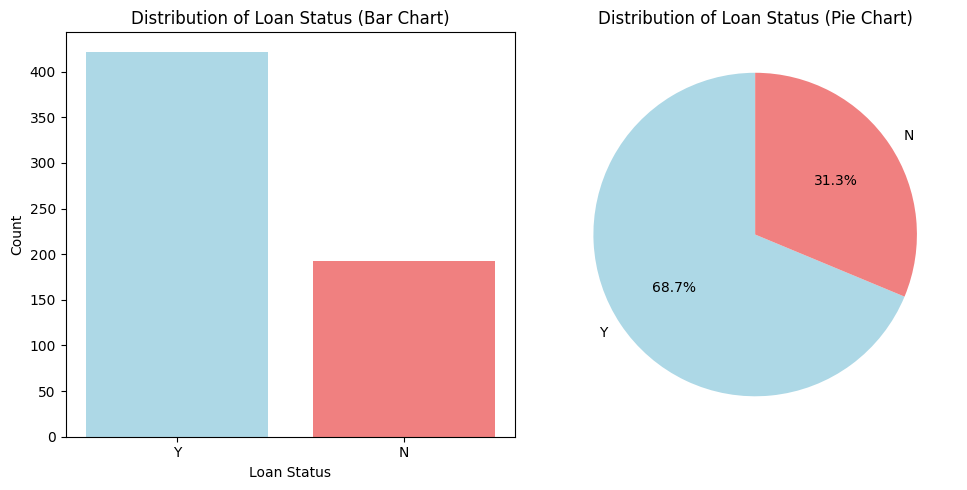

In [ ]:
# Menghitung distribusi Loan Status
loan_status_distribution = df['Loan_Status'].value_counts()

# Membuat diagram batang
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(loan_status_distribution.index, loan_status_distribution.values, color=['lightblue', 'lightcoral'])
plt.title('Distribution of Loan Status (Bar Chart)')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Membuat diagram pie
plt.subplot(1, 2, 2)
plt.pie(loan_status_distribution, labels=loan_status_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Distribution of Loan Status (Pie Chart)')

plt.tight_layout()
plt.show()

Pada dataset yang digunakan status loan ditolak lebih rendah dari loan diterima yaitu 31.3%. Berdasarkan data tersebut, dataset ini dapat dikatakan dataset yang tidak seimbang atau imbalance.

### Distribusi Gender

In [ ]:
# Membuat diagram batang untuk visualisasi Gender terhadap Loan Status
gender_loan_status_count = pd.crosstab(df['Gender'], df['Loan_Status'])
gender_loan_status_count

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [ ]:
# Normalisasi data ke dalam presentase
gender_loan_status_percentage = gender_loan_status_count.div(gender_loan_status_count.sum(axis=1), axis=0) * 100
gender_loan_status_percentage

Loan_Status,N,Y
Gender,,
Female,33.035714,66.964286
Male,30.674847,69.325153


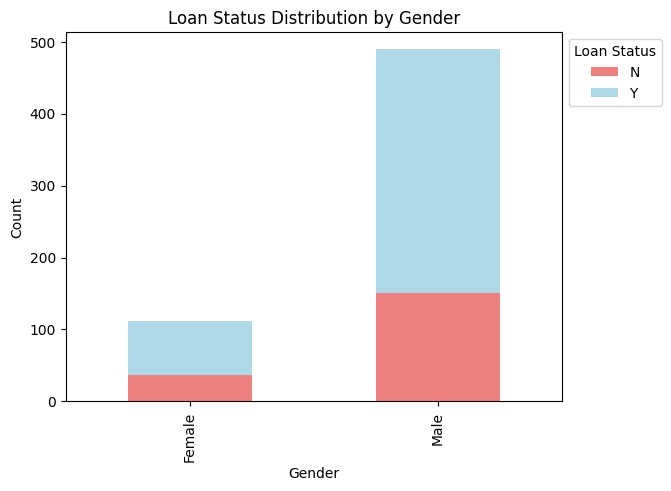

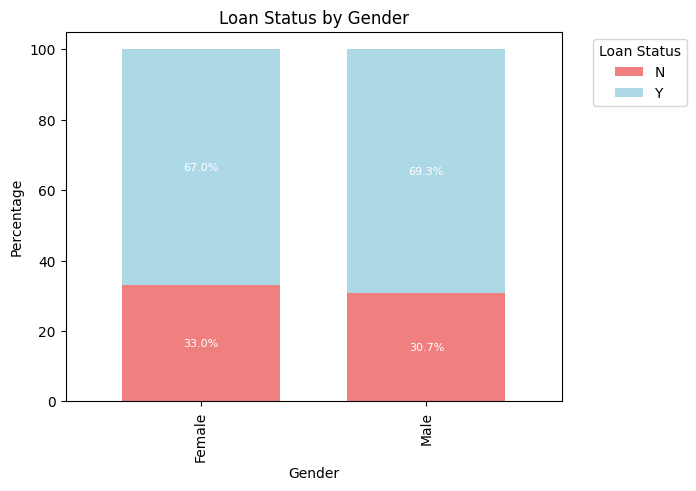

In [ ]:
# Visualisasi Distribusi Gender
gender_loan_status_count.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Loan Status Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1, 1))
plt.show()

# Plotting
fig, ax = plt.subplots()

# Bar plot dengan nilai presentase dan warna kustom
bars = gender_loan_status_percentage.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], ax=ax, width=0.7)

# Menambahkan label
ax.set_ylabel('Percentage')
ax.set_title('Loan Status by Gender')

# Menambahkan legenda
ax.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan anotasi pada setiap stack
for bar in bars.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

Dari distribusi gender, didapatkan insight bahwa pemohon lebih banyak berjenis kelamin laki-laki. Presentase distirbusi setiap gender terhadap setatus pengajuan loan memiliki presentase yang hampir sama.

### Distribusi Married

In [ ]:
# Membuat diagram batang untuk visualisasi Married terhadap Loan Status
married_loan_status_count = pd.crosstab(df['Married'], df['Loan_Status'])
married_loan_status_count

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [ ]:
# Normalisasi data ke dalam presentase
married_loan_status_percentage = married_loan_status_count.div(married_loan_status_count.sum(axis=1), axis=0) * 100
married_loan_status_percentage

Loan_Status,N,Y
Married,,
No,37.089202,62.910798
Yes,28.391960,71.608040


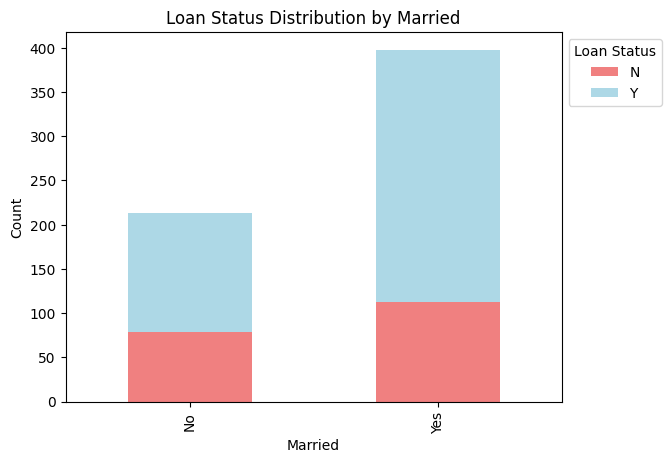

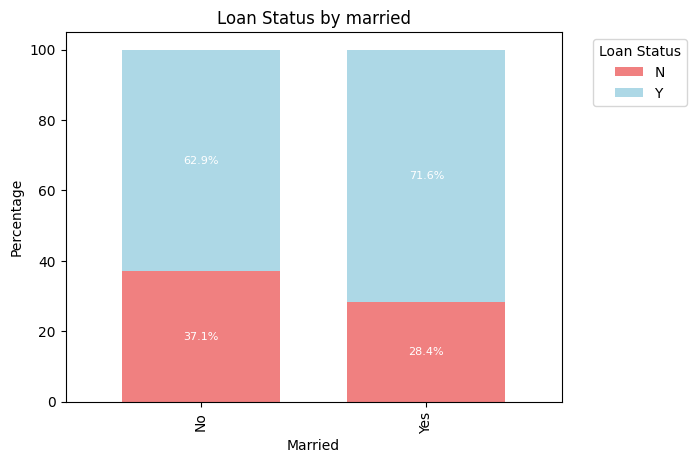

In [ ]:
# Visualisasi Distribusi Married
married_loan_status_count.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Loan Status Distribution by Married')
plt.xlabel('Married')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1, 1))
plt.show()

# Plotting
fig, ax = plt.subplots()

# Bar plot dengan nilai presentase dan warna kustom
bars = married_loan_status_percentage.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], ax=ax, width=0.7)

# Menambahkan label
ax.set_ylabel('Percentage')
ax.set_title('Loan Status by married')

# Menambahkan legenda
ax.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan anotasi pada setiap stack
for bar in bars.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

Pemohon loan lebih banyak yang berstatus sudah menikah daripada yang belum menikah. Presentasi pada masing-masing status menikah didominasi dengan status Yes

### Distribusi Dependents

In [ ]:
# Membuat diagram batang untuk visualisasi Dependents terhadap Loan Status
dependents_loan_status_count = pd.crosstab(df['Dependents'], df['Loan_Status'])
dependents_loan_status_count

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [ ]:
# Normalisasi data ke dalam presentase
dependents_loan_status_percentage = dependents_loan_status_count.div(dependents_loan_status_count.sum(axis=1), axis=0) * 100
dependents_loan_status_percentage

Loan_Status,N,Y
Dependents,,
0,31.014493,68.985507
1,35.294118,64.705882
2,24.752475,75.247525
3+,35.294118,64.705882


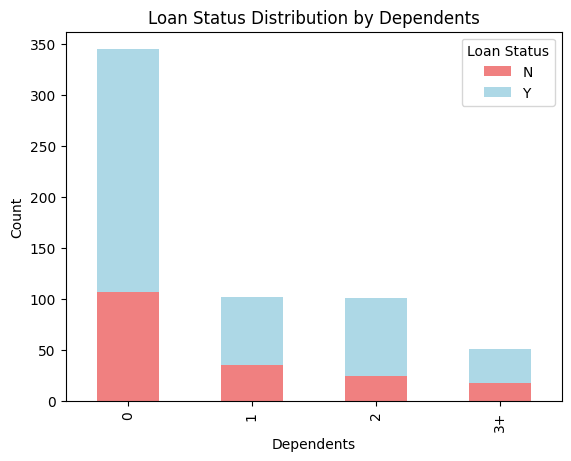

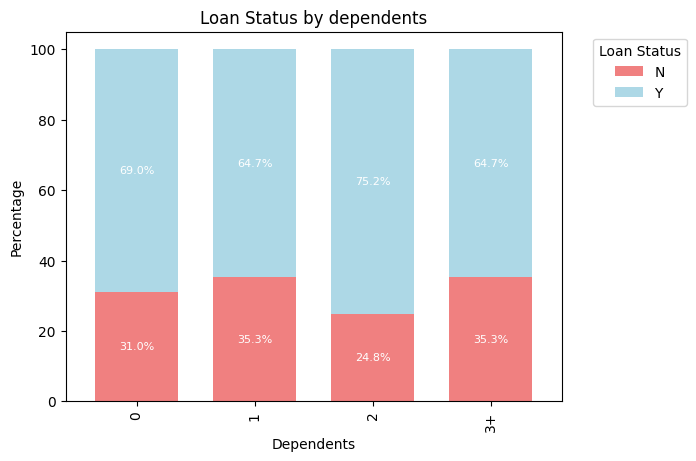

In [ ]:
# Visualisasi Distribusi Dependents
dependents_loan_status_count.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Loan Status Distribution by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1, 1))
plt.show()

# Plotting
fig, ax = plt.subplots()

# Bar plot dengan nilai presentase dan warna kustom
bars = dependents_loan_status_percentage.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], ax=ax, width=0.7)

# Menambahkan label
ax.set_ylabel('Percentage')
ax.set_title('Loan Status by dependents')

# Menambahkan legenda
ax.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan anotasi pada setiap stack
for bar in bars.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

Berdasarkan tanggungan, pemohon tanpa tanggungan (dependents) lebih banyak dari pada pemohon dengan tanggungan. Pada jumlah tanggungan semua kategori memiliki loan status Yes lebih dari 60%

### Distribusi Education

In [ ]:
# Membuat diagram batang untuk visualisasi education terhadap Loan Status
education_loan_status_count = pd.crosstab(df['Education'], df['Loan_Status'])
education_loan_status_count

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [ ]:
# Normalisasi data ke dalam presentase
education_loan_status_percentage = education_loan_status_count.div(education_loan_status_count.sum(axis=1), axis=0) * 100
education_loan_status_percentage

Loan_Status,N,Y
Education,,
Graduate,29.166667,70.833333
Not Graduate,38.805970,61.194030


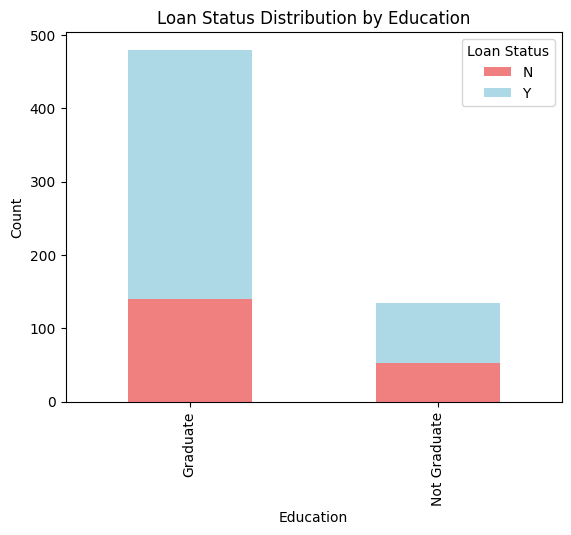

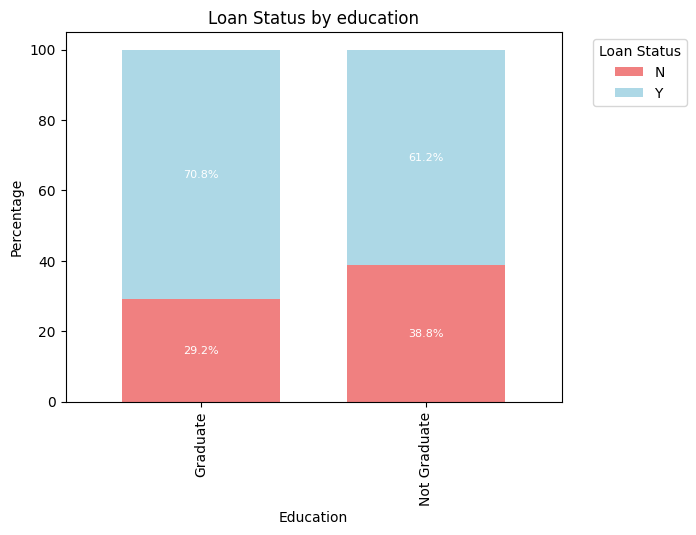

In [ ]:
# Visualisasi Distribusi Education
education_loan_status_count.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Loan Status Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1, 1))
plt.show()

# Plotting
fig, ax = plt.subplots()

# Bar plot dengan nilai presentase dan warna kustom
bars = education_loan_status_percentage.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], ax=ax, width=0.7)

# Menambahkan label
ax.set_ylabel('Percentage')
ax.set_title('Loan Status by education')

# Menambahkan legenda
ax.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan anotasi pada setiap stack
for bar in bars.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

Berdasarkan pendidikan, pemohon lulus pendidikan lebih banyak dari pada pemohon yang tidak lulus. Pada masing-masing kategori loan status yes lebih dari 60%

### Distribusi Self Employed

In [ ]:
# Membuat diagram batang untuk visualisasi self_employed terhadap Loan Status
self_employed_loan_status_count = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
self_employed_loan_status_count

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [ ]:
# Normalisasi data ke dalam presentase
self_employed_loan_status_percentage = self_employed_loan_status_count.div(self_employed_loan_status_count.sum(axis=1), axis=0) * 100
self_employed_loan_status_percentage

Loan_Status,N,Y
Self_Employed,,
No,31.400000,68.600000
Yes,31.707317,68.292683


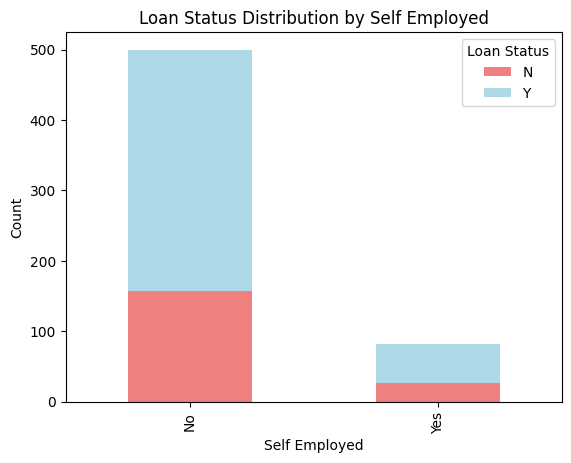

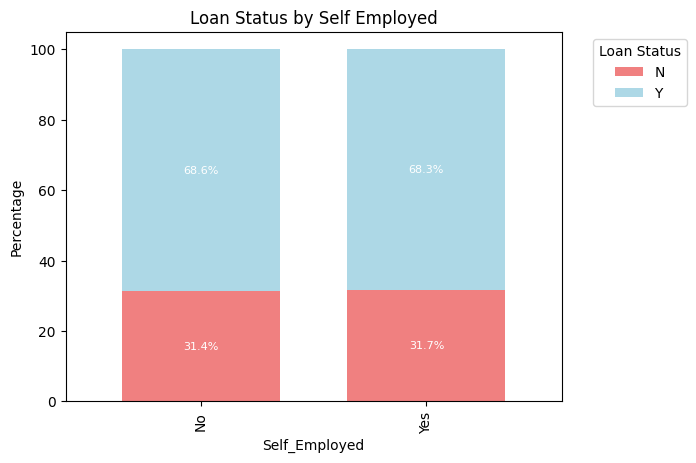

In [ ]:
# Visualisasi Distribusi Self Employed
self_employed_loan_status_count.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Loan Status Distribution by Self Employed')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1, 1))
plt.show()

# Plotting
fig, ax = plt.subplots()

# Bar plot dengan nilai presentase dan warna kustom
bars = self_employed_loan_status_percentage.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], ax=ax, width=0.7)

# Menambahkan label
ax.set_ylabel('Percentage')
ax.set_title('Loan Status by Self Employed')

# Menambahkan legenda
ax.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan anotasi pada setiap stack
for bar in bars.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

Berdasarkan pekerjaan mandiri (wirausaha), pemohon tidak bekerja secara mandiri lebih banyak dari pada pemohon yang bekerja secara mandiri. Pada setiap kategori presentase status loan yes adalah 68%

### Distribusi Self Credit History

In [ ]:
# Membuat diagram batang untuk visualisasi credit_history terhadap Loan Status
credit_history_loan_status_count = pd.crosstab(df['Credit_History'], df['Loan_Status'])
credit_history_loan_status_count

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [ ]:
# Normalisasi data ke dalam presentase
credit_history_loan_status_percentage = credit_history_loan_status_count.div(credit_history_loan_status_count.sum(axis=1), axis=0) * 100
credit_history_loan_status_percentage

Loan_Status,N,Y
Credit_History,,
0.0,92.134831,7.865169
1.0,20.421053,79.578947


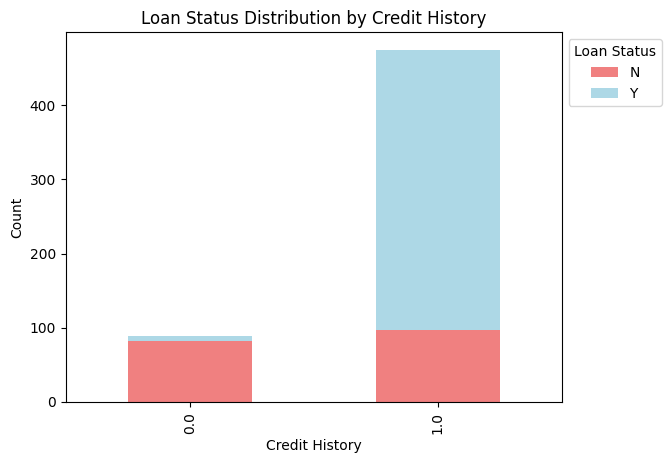

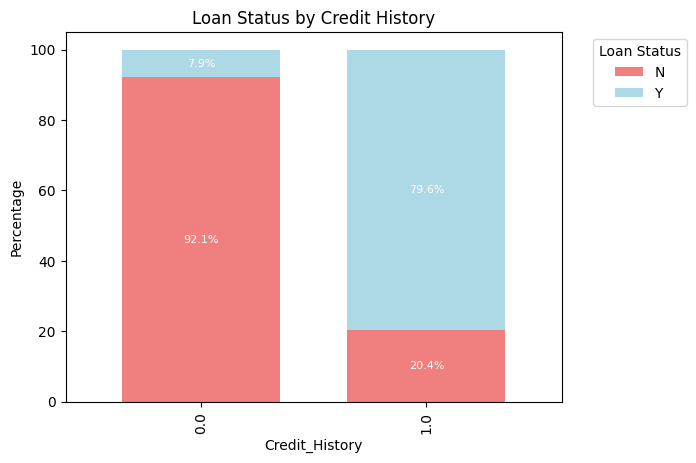

In [ ]:
# Visualisasi Distribusi Credit History
credit_history_loan_status_count.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Loan Status Distribution by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1, 1))
plt.show()

# Plotting
fig, ax = plt.subplots()

# Bar plot dengan nilai presentase dan warna kustom
bars = credit_history_loan_status_percentage.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], ax=ax, width=0.7)

# Menambahkan label
ax.set_ylabel('Percentage')
ax.set_title('Loan Status by Credit History')

# Menambahkan legenda
ax.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan anotasi pada setiap stack
for bar in bars.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

Berdasarkan credit history, pemohon yang pernah melakukan credit lebih banyak dari pada pemohon yang belum pernah, dan hanya sedikit loan yang diterima pada pemohon dengan belum ada riwayat credit. Pada riwayat 98% dari pemohon yang belum memiliki riwayat kredit ditolak, sedangkan jika sudah memiliki riwayat pemohom ditolak hanya 20% saja.

### Distribusi Self Property_Area

In [ ]:
# Membuat diagram batang untuk visualisasi property_area terhadap Loan Status
property_area_loan_status_count = pd.crosstab(df['Property_Area'], df['Loan_Status'])
property_area_loan_status_count

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [ ]:
# Normalisasi data ke dalam presentase
property_area_loan_status_percentage = property_area_loan_status_count.div(property_area_loan_status_count.sum(axis=1), axis=0) * 100
property_area_loan_status_percentage

Loan_Status,N,Y
Property_Area,,
Rural,38.547486,61.452514
Semiurban,23.175966,76.824034
Urban,34.158416,65.841584


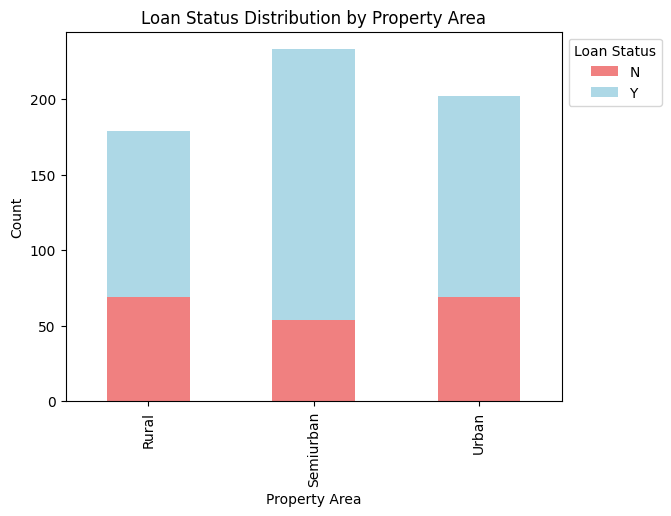

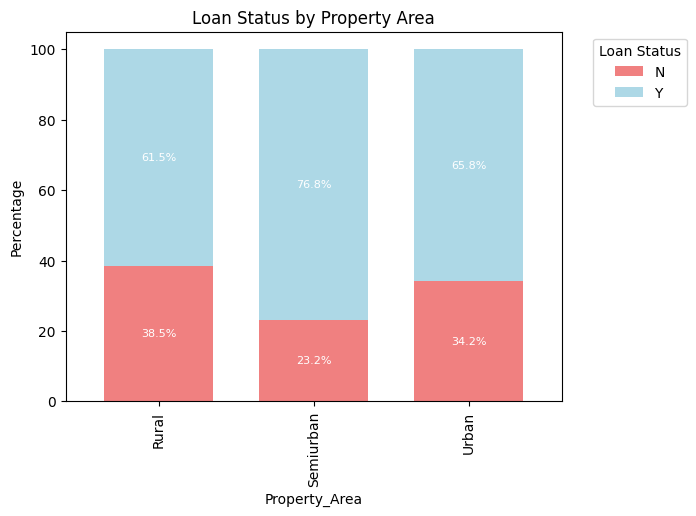

In [ ]:
# Visualisasi Distribusi Property Area
property_area_loan_status_count.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Loan Status Distribution by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1, 1))
plt.show()

# Plotting
fig, ax = plt.subplots()

# Bar plot dengan nilai presentase dan warna kustom
bars = property_area_loan_status_percentage.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], ax=ax, width=0.7)

# Menambahkan label
ax.set_ylabel('Percentage')
ax.set_title('Loan Status by Property Area')

# Menambahkan legenda
ax.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan anotasi pada setiap stack
for bar in bars.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

Berdasarkan area properti, properti pada area semi urban lebih banyak dari pada properti pada area lain. Setiap kategori properti area memiliki 60% lebih data yang loan status = yes

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Distribusi Data Numerik dengan Histogram

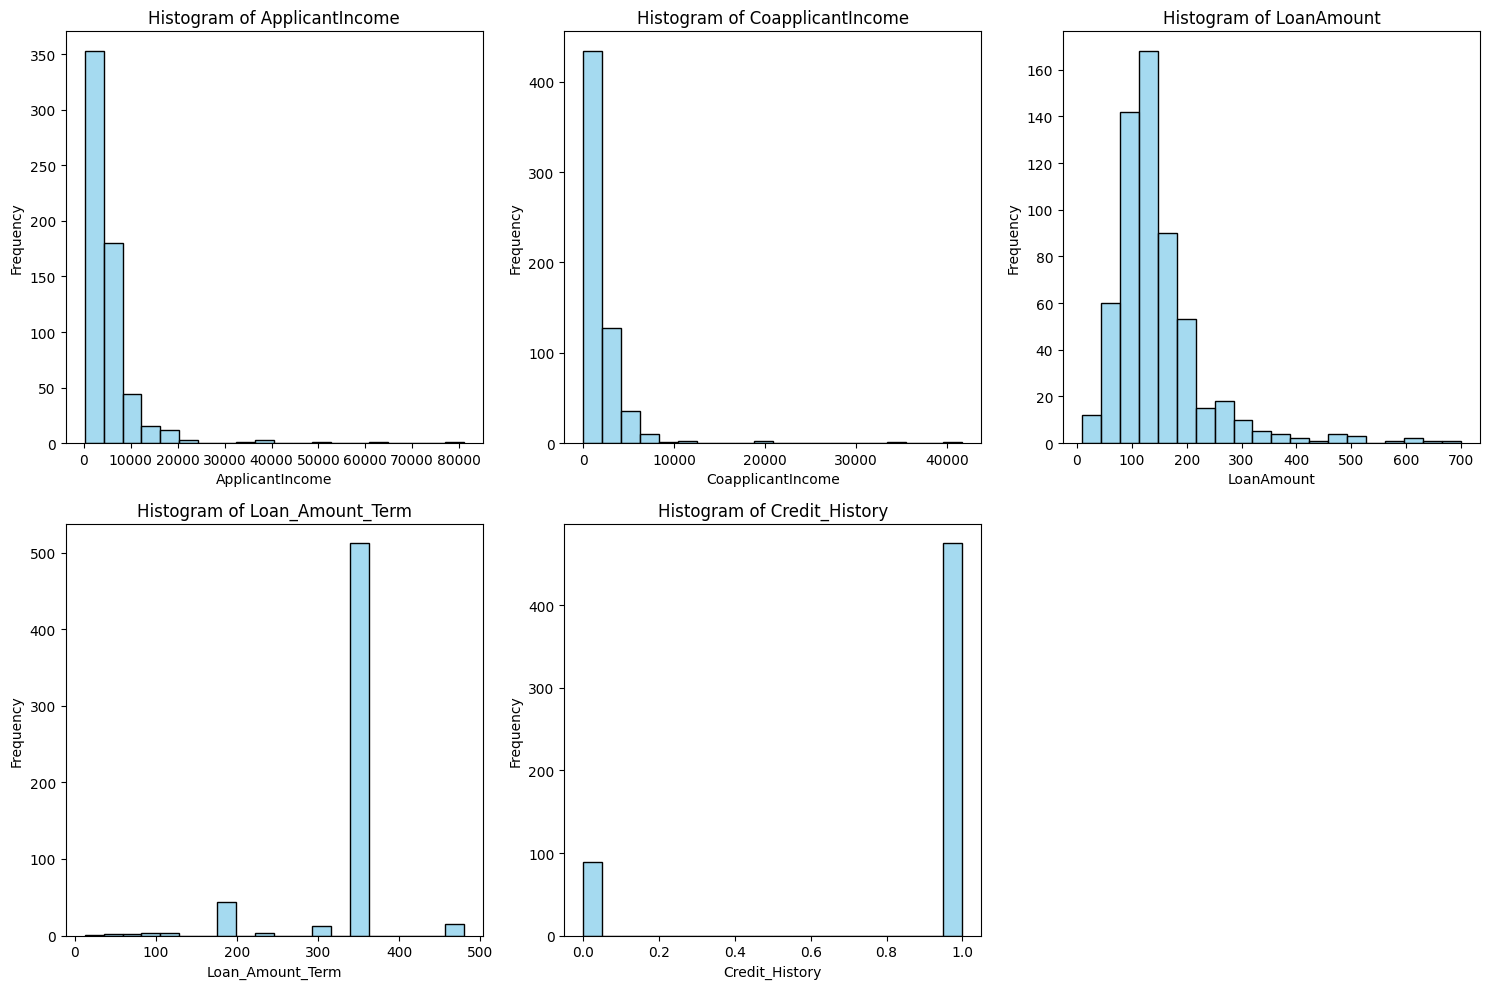

In [ ]:
# Membuat histogram untuk semua kolom numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Membuat grid plot untuk histogram
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column].dropna(), bins=20, kde=False, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

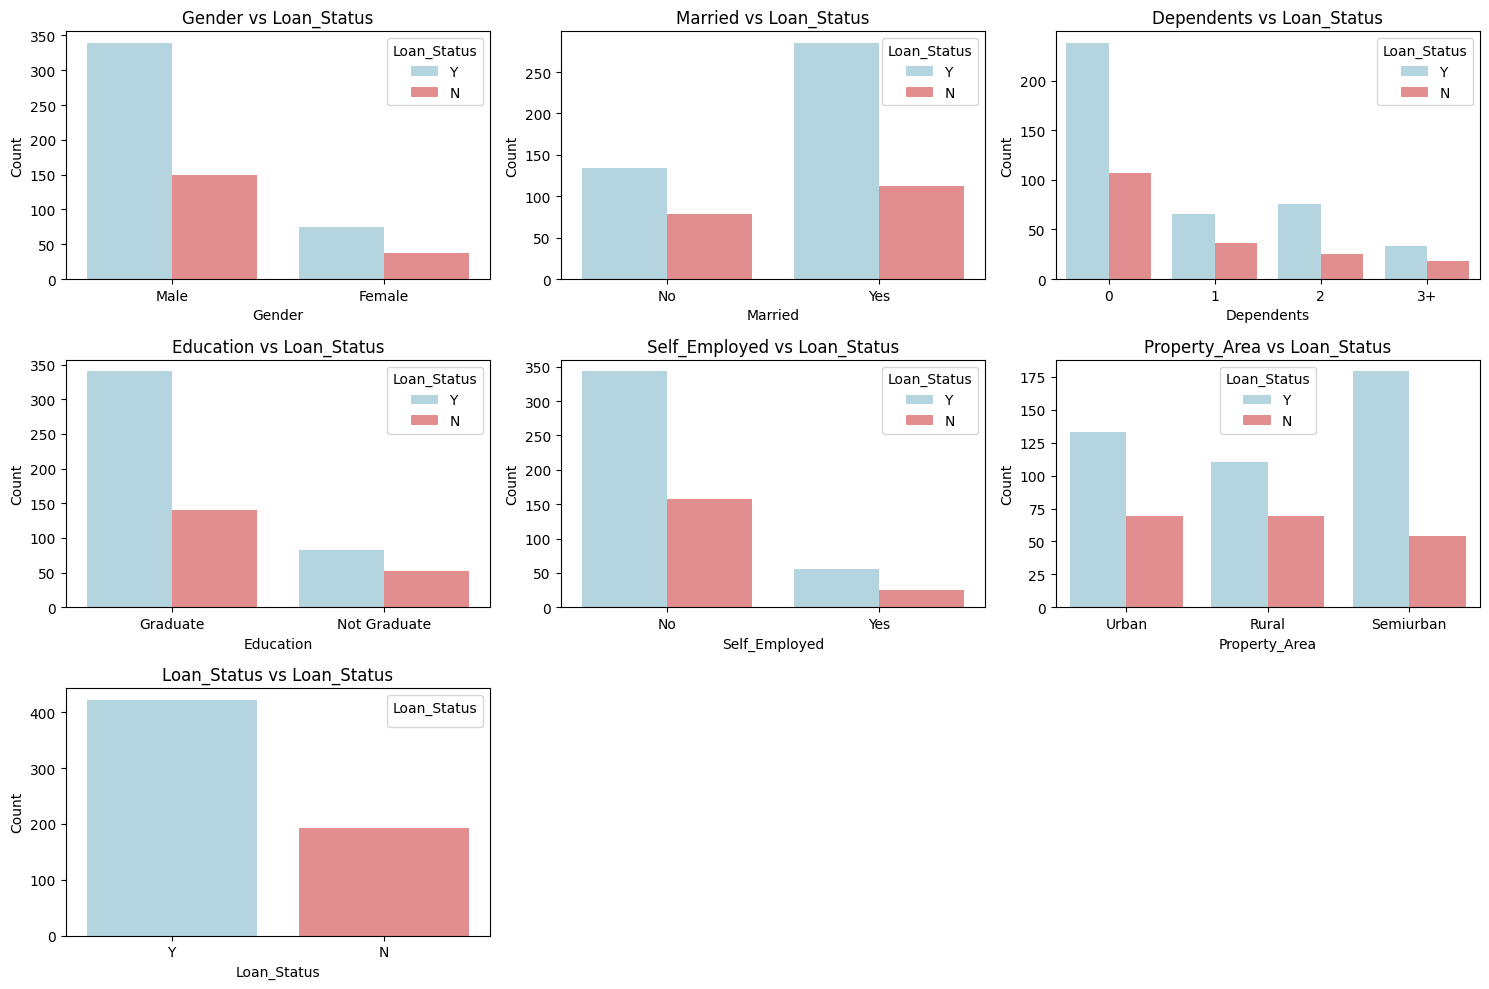

In [ ]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat kategorikal data untuk stacking bar
categorical_data = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']]

# Membuat stacked bar plot
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_data.columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=categorical_data, x=column, hue='Loan_Status', palette={'Y': 'lightblue', 'N': 'lightcoral'})
    plt.title(f'{column} vs Loan_Status')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Loan_Status')

plt.tight_layout()
plt.show()


# Data Preprocessing

## Data Cleaning

Melakukan data Cleaning terhadap df_train dan df_test

In [ ]:
df_prep = df.copy()
df_prep.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Menghapus kolom yang tidak digunakan

Tahap ini akan dilakukan proses pengecekan dan pembersihan data yang kosong atau tidak terpakai

Menghapus kolom data yang tidak digunakan yaitu Loan ID

In [ ]:
df_prep = df_prep.drop(['Loan_ID'], axis=1)
df_prep.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# cek jumlah data kosong
print('Data null pada data train: ')
df_prep.isnull().sum()

Data null pada data train: 


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# percobaan
#Mengisi nilai null pada kolom "Gender" dengan modus
df_prep['Gender'] = df_prep['Gender'].fillna(df['Gender'].mode()[0])

# Mengisi nilai null pada kolom "Married" dengan modus
df_prep['Married'] = df_prep['Married'].fillna(df['Married'].mode()[0])

# Mengisi nilai null pada kolom "Dependents" dengan modus
df_prep['Dependents'] = df_prep['Dependents'].fillna(df['Dependents'].mode()[0])

# Mengisi nilai null pada kolom "Self_Employed" dengan modus
df_prep['Self_Employed'] = df_prep['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# Mengisi nilai null pada kolom "Credit_History" dengan modus
df_prep['Credit_History'] = df_prep['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Mengisi nilai null pada kolom "LoanAmount" dengan median
df_prep['LoanAmount'] = df_prep['LoanAmount'].fillna(df['LoanAmount'].median())

# Mengisi nilai null pada kolom "Loan_Amount_Term" dengan median
df_prep['Loan_Amount_Term'] = df_prep['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [ ]:
# cek jumlah data kosong
print('Data null pada data train: ')
df_prep.isnull().sum()

Data null pada data train: 


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encode Label

In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
df_prep.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_category = df_prep.select_dtypes(include=['object'])
label_mappings = {}  # Membuat kamus kosong untuk menyimpan label mappings

for kolom in df_category.columns:
    le.fit(df_category[kolom])
    df_prep[kolom] = le.transform(df_category[kolom])

    if kolom in df_category:
        print(f"kolom = {kolom}")
        label_mapping = {label: code for label, code in zip(le.classes_, le.transform(le.classes_))}
        label_mappings[kolom] = label_mapping  # Menambahkan label mapping ke kamus
        for label, code in label_mapping.items():
            print(f"label asli: {label} label encode: {code}")
        print()


print(df_prep.head(5))
print('===================')

kolom = Gender
label asli: Female label encode: 0
label asli: Male label encode: 1

kolom = Married
label asli: No label encode: 0
label asli: Yes label encode: 1

kolom = Dependents
label asli: 0 label encode: 0
label asli: 1 label encode: 1
label asli: 2 label encode: 2
label asli: 3+ label encode: 3

kolom = Education
label asli: Graduate label encode: 0
label asli: Not Graduate label encode: 1

kolom = Self_Employed
label asli: No label encode: 0
label asli: Yes label encode: 1

kolom = Property_Area
label asli: Rural label encode: 0
label asli: Semiurban label encode: 1
label asli: Urban label encode: 2

kolom = Loan_Status
label asli: N label encode: 0
label asli: Y label encode: 1

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             30

## Feature Selection

Feature selection digunakan untuk meringkas fitur-fitur terpenting untuk mempermudah model dalam mempelajari data.

Feature selection dilakukan dengan algoritma random forest.

Hasil feature selection ini nantinya akan dikomparasi dengan data normal tanpa seleksi fitur.

In [ ]:

# drop target
X = df_prep.drop(['Loan_Status'], axis=1)
y = df_prep['Loan_Status']

print(X)
print(y)

# # drop target
# X_test = df_prep_test.drop(['Loan_Status'], axis=1)
# y_test = df_prep_test['Loan_Status']

# print(X_test)
# print(y_test)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model pada data
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
feature_importances = rf_model.feature_importances_
feature_importances

array([0.01781415, 0.0241464 , 0.04440192, 0.02230856, 0.017957  ,
       0.21148263, 0.11860949, 0.18403339, 0.04501949, 0.26716861,
       0.04705836])

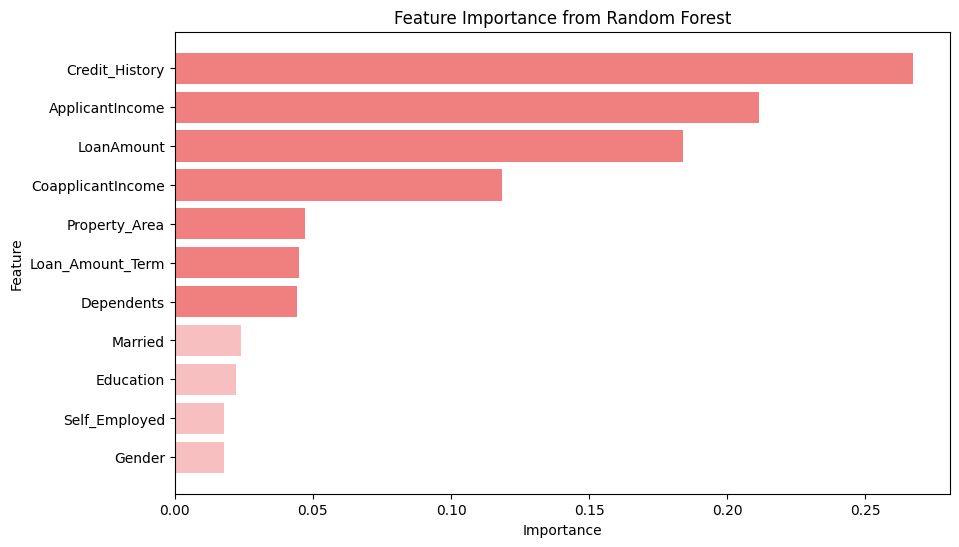

In [ ]:
import matplotlib.pyplot as plt

# Mendapatkan nama fitur
feature_names = X.columns  # Gantilah ini dengan nama kolom sesuai dengan dataset Anda

# Membuat DataFrame untuk memudahkan visualisasi
import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Mengurutkan DataFrame berdasarkan nilai kepentingan fitur
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Membuat horizontal bar chart dengan warna khusus untuk bar ke-8 dan seterusnya
plt.figure(figsize=(10, 6))

# Memberikan alpha global untuk seluruh diagram batang
alpha_value = 0.5

# Mengonfigurasi warna dan alpha untuk setiap bar
colors = ['lightcoral' if imp < 0.04 else 'lightcoral' for imp in feature_importance_df['Importance']]
alpha_values = [alpha_value if imp < 0.04 else 1.0 for imp in feature_importance_df['Importance']]

bars = plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center',
               color=colors, alpha=alpha_value)

# Memberikan alpha sesuai dengan kondisi
for i, alpha in enumerate(alpha_values):
    bars[i].set_alpha(alpha)

plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


Dari hasil seleksi fitur terpilih 7 fitur terpenting berdasarkan random forest

Mengambil 7 fitur terbaik dengan library SelectFromModel berdasarkan ambang batas yang diketahui diatas yaitu 0.04

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Menggunakan ambang batas untuk seleksi fitur
sfm = SelectFromModel(rf_model, threshold=0.04)  # Sesuaikan ambang batas sesuai kebutuhan
sfm.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold=0.04)

In [ ]:
# Membuat masker untuk fitur yang dipilih
selected_features_mask = sfm.get_support()

# Mengambil nama fitur yang dipilih dari DataFrame
selected_features = X.columns[selected_features_mask]

# Menampilkan nama fitur yang dipilih
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [ ]:
# Membuat DataFrame baru hanya dengan fitur yang dipilih
X_selected= pd.DataFrame(X, columns=selected_features)
# X_selected_test= pd.DataFrame(X_test, columns=selected_features)

# Menampilkan DataFrame baru
print("Selected Features in X_train:")
print(X_selected.shape)

# print("Selected Features in X_test:")
# print(X_selected_test.shape)

Selected Features in X_train:
(614, 7)


## Over Sampling SMOTE

Dikarenakan data tidak seimbang maka diperlukan tuning dengan menyeimbangkan data untuk mengetahui dataset dan model terbaiknya

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)


X_smote, y_smote = smote.fit_resample(X, y)
X_selected_smote, y_selected_smote = smote.fit_resample(X_selected, y)

In [ ]:
y_smote.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

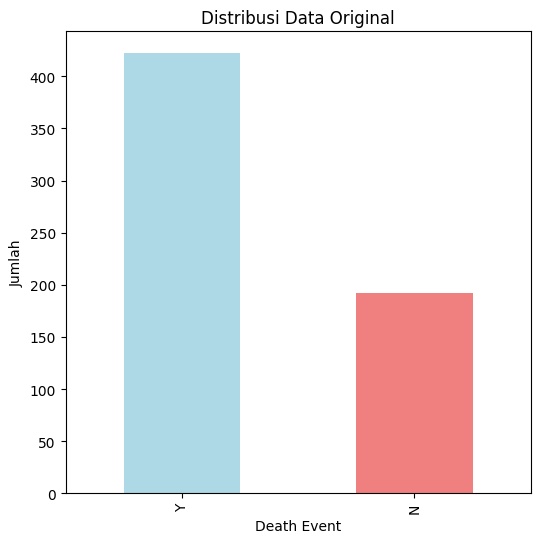

In [ ]:
# Mengganti nilai 0 menjadi 'tidak' dan nilai 1 menjadi 'iya'
# y_smote_labels = y_smote.replace({0: 'Tidak', 1: 'Iya'})

colors = ['lightblue', 'lightcoral']

# Membuat gambar dengan dua subplot (bar plot dan pie chart)
fig, axs = plt.subplots(1, figsize=(6, 6))

# Subplot 1 - Bar Plot
df['Loan_Status'].value_counts().plot(kind='bar', color=colors)
axs.set_title('Distribusi Data Original')
axs.set_xlabel('Death Event')
axs.set_ylabel('Jumlah')

plt.show()

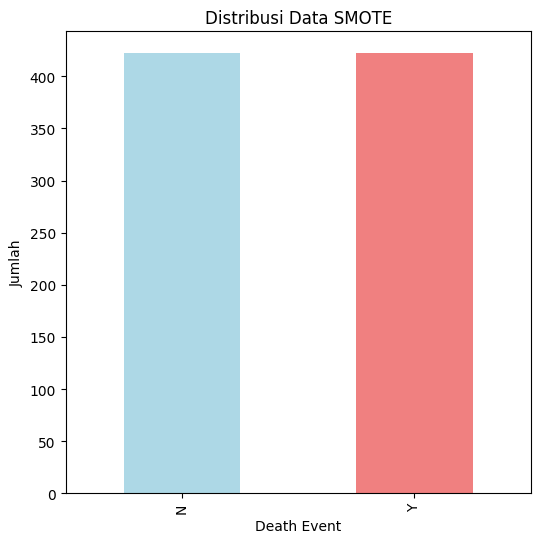

In [ ]:
# Mengganti nilai 0 menjadi 'tidak' dan nilai 1 menjadi 'iya'
y_smote_labels = y_smote.replace({0: 'Y', 1: 'N'})


# Membuat gambar dengan dua subplot (bar plot dan pie chart)
fig, axs = plt.subplots(1, figsize=(6, 6))

# Subplot 1 - Bar Plot
y_smote_labels.value_counts().plot(kind='bar', color=colors)
axs.set_title('Distribusi Data SMOTE')
axs.set_xlabel('Death Event')
axs.set_ylabel('Jumlah')

plt.show()

## Split Dataset

Split dataset jadi train dan test dengan skala 80:20. Split dilakukan diawal supaya tahap preprosesing yang dilakukan pure sesuai dari data train dan penyesuaian dilakukan terpisah ke data test.

In [ ]:
# Atribut dan target
X = df_prep.drop(['Loan_Status'], axis=1)
y = df_prep['Loan_Status']

print(X)
print(y)

X_selected = X_selected
y_selected = y = df_prep['Loan_Status']

print(X_selected)
print(y_selected)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [ ]:
# test_size = 0.20 artinya data testing 20% dan data training 80%
# random_state = 42 digunakan untuk menspesifikasikan random seed pada saat pembagian data training dan data testing

# split full dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# split featur selection dataset
X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(X_selected, y_selected, test_size = 0.2, random_state = 42, stratify=y)

In [ ]:
# Mengetahui dimensi data train dan data test
print('Dimensi feature data train :', X_train.shape)
print('Dimensi target data train :', y_train.shape)
print('Dimensi feature data test :', X_test.shape)
print('Dimensi target data test :', y_test.shape)
print()

print('Dimensi feature data train :', X_selected_train.shape)
print('Dimensi target data train :', y_selected_train.shape)
print('Dimensi feature data test :', X_selected_test.shape)
print('Dimensi target data test :', y_selected_test.shape)

Dimensi feature data train : (491, 11)
Dimensi target data train : (491,)
Dimensi feature data test : (123, 11)
Dimensi target data test : (123,)

Dimensi feature data train : (491, 7)
Dimensi target data train : (491,)
Dimensi feature data test : (123, 7)
Dimensi target data test : (123,)


#Modeling

## Random Forest

### Pelatihan model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def cv_randomforest(X_data, y_data, data_name):
    # Create a Random Forest Classifier
    rf_classifier = RandomForestClassifier()

    # Define the parameter grid to search
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']  # Tambahkan parameter criterion
    }

    # Create the GridSearchCV object
    grid = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Perform the cross-validation
    grid.fit(X_data, y_data)

    # Print the best parameters and corresponding accuracy
    print(f'Data {data_name}')
    print("Best Parameters: ", grid.best_params_)
    print("Best Accuracy: ", grid.best_score_)
    print()

    # Extract the best parameters for each dataset
    best_params = grid.best_params_

    # Create Random Forest Classifier with the best parameters for each dataset
    best_rf_classifier = RandomForestClassifier(**best_params)

    # Fit the models on the training data again (optional, as grid search already fits the best model)
    best_rf_classifier.fit(X_data, y_data)

    return best_rf_classifier


In [ ]:
# Deklarasi best model hasil tuning
best_rf_ori = cv_randomforest(X, y, 'Ori')
best_rf_smote = cv_randomforest(X_smote, y_smote, 'Smote')
best_selected_rf_ori = cv_randomforest(X_selected, y, 'Ori_selected')
best_selected_rf_smote = cv_randomforest(X_selected_smote, y_selected_smote, 'Smote_selected')

Data Ori
Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy:  0.8127415700386512

Data Smote
Best Parameters:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy:  0.840152155536771

Data Ori_selected
Best Parameters:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy:  0.8176329468212715

Data Smote_selected
Best Parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy:  0.8282685263454495



### Evaluasi Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def evaluasi_model(X_data, y_data, model, data_name):
    y_pred = model.predict(X_data)
    y_prob = model.predict_proba(X_data)[:, 1]  # Untuk ROC AUC, kita membutuhkan probabilitas positif

    acc = accuracy_score(y_data, y_pred)
    precision = precision_score(y_data, y_pred)
    recall = recall_score(y_data, y_pred)
    f1 = f1_score(y_data, y_pred)
    roc_auc = roc_auc_score(y_data, y_prob)  # ROC AUC Score

    print(f'{data_name}:')
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("ROC AUC:", roc_auc)
    print(f'Classification Report:\n{classification_report(y_data, y_pred)}')

    print()

    return acc, precision, recall, f1, roc_auc


In [ ]:
acc_rf_ori, precision_rf_ori, recall_rf_ori, f1_rf_ori, roc_auc_rf_ori = evaluasi_model(X_test, y_test, best_rf_ori, 'Ori')
acc_rf_smote, precision_rf_smote, recall_rf_smote, f1_rf_smote, roc_auc_rf_smote = evaluasi_model(X_test, y_test, best_rf_smote, 'smote')
acc_selected_rf_ori, precision_selected_rf_ori, recall_selected_rf_ori, f1_selected_rf_ori, roc_auc_selected_rf_ori = evaluasi_model(X_selected_test, y_test, best_selected_rf_ori, 'Ori_selected')
acc_selected_rf_smote, precision_selected_rf_smote, recall_selected_rf_smote, f1_selected_rf_smote, roc_auc_selected_rf_smote = evaluasi_model(X_selected_test, y_test, best_selected_rf_smote, 'smote_selected')

Ori:
Accuracy: 0.8861788617886179
Precision: 0.865979381443299
Recall: 0.9882352941176471
F1-score: 0.9230769230769231
ROC AUC: 0.956656346749226
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78        38
           1       0.87      0.99      0.92        85

    accuracy                           0.89       123
   macro avg       0.91      0.82      0.85       123
weighted avg       0.90      0.89      0.88       123


smote:
Accuracy: 0.975609756097561
Precision: 0.9767441860465116
Recall: 0.9882352941176471
F1-score: 0.9824561403508771
ROC AUC: 0.9984520123839009
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.98      0.99      0.98        85

    accuracy                           0.98       123
   macro avg       0.97      0.97      0.97       123
weighted avg       0.98      0.98      0.98       123


Ori

# 7. Evaluasi

In [ ]:
evaluasi = {'model_x_dataset': ['RF Ori', 'RF Smote', 'Selected RF Ori', 'Selected RF Smote'],
            'accuracy': [acc_rf_ori, acc_rf_smote, acc_selected_rf_ori, acc_selected_rf_smote],
            'precision': [precision_rf_ori, precision_rf_smote, precision_selected_rf_ori, precision_selected_rf_smote],
            'recall': [recall_rf_ori, recall_rf_smote, recall_selected_rf_ori, recall_selected_rf_smote],
            'f1-score': [f1_rf_ori, f1_rf_smote, f1_selected_rf_ori, f1_selected_rf_smote]}


In [ ]:
import numpy as np

# Membulatkan semua angka dalam matriks evaluasi menjadi 2 digit dibelakang koma
for key in evaluasi:
    if key != 'model_x_dataset':
      evaluasi[key] = np.around(evaluasi[key], decimals=3)

# Menampilkan matriks evaluasi yang telah dibulatkan
print(evaluasi)

{'model_x_dataset': ['RF Ori', 'RF Smote', 'Selected RF Ori', 'Selected RF Smote'], 'accuracy': array([0.886, 0.976, 0.943, 1.   ]), 'precision': array([0.866, 0.977, 0.933, 1.   ]), 'recall': array([0.988, 0.988, 0.988, 1.   ]), 'f1-score': array([0.923, 0.982, 0.96 , 1.   ])}


In [ ]:
df_evaluasi = pd.DataFrame(evaluasi)
df_evaluasi

,model_x_dataset,accuracy,precision,recall,f1-score
0,RF Ori,0.886,0.866,0.988,0.923
1,RF Smote,0.976,0.977,0.988,0.982
2,Selected RF Ori,0.943,0.933,0.988,0.960
3,Selected RF Smote,1.000,1.000,1.000,1.000


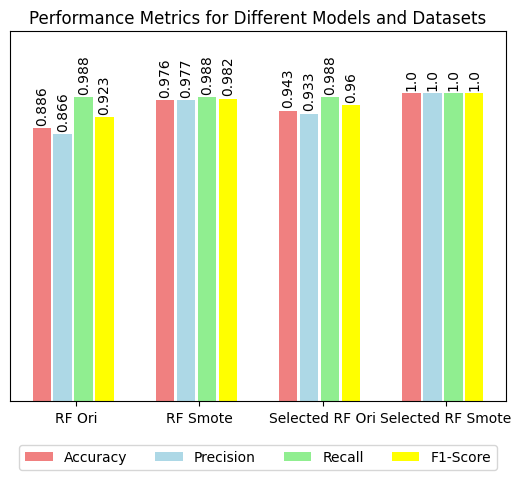

In [ ]:
# Warna yang berbeda tapi tetap satu tone dan lembut
colors = ['lightcoral', 'lightblue', 'lightgreen', 'yellow']

# Batas atas sumbu y
y_upper_limit = 1.2

# Bar chart
barWidth = 0.15
space = 0.02  # Jarak antara grup bar

r1 = np.arange(len(df_evaluasi['model_x_dataset']))
r2 = [x + barWidth + space for x in r1]
r3 = [x + barWidth + space for x in r2]
r4 = [x + barWidth + space for x in r3]

plt.bar(r1, df_evaluasi['accuracy'], color=colors[0], width=barWidth, edgecolor='none', linewidth=0, label='Accuracy')
plt.bar(r2, df_evaluasi['precision'], color=colors[1], width=barWidth, edgecolor='none', linewidth=0, label='Precision')
plt.bar(r3, df_evaluasi['recall'], color=colors[2], width=barWidth, edgecolor='none', linewidth=0, label='Recall')
plt.bar(r4, df_evaluasi['f1-score'], color=colors[3], width=barWidth, edgecolor='none', linewidth=0, label='F1-Score')

# Menambahkan nilai di atas setiap bar dengan rotasi 90 derajat ke kiri
for i, val in enumerate(df_evaluasi['accuracy']):
    plt.text(r1[i], min(val + 0.01, y_upper_limit), round(val, 3), rotation=90, ha='center', va='bottom')

for i, val in enumerate(df_evaluasi['precision']):
    plt.text(r2[i], min(val + 0.01, y_upper_limit), round(val, 3), rotation=90, ha='center', va='bottom')

for i, val in enumerate(df_evaluasi['recall']):
    plt.text(r3[i], min(val + 0.01, y_upper_limit), round(val, 3), rotation=90, ha='center', va='bottom')

for i, val in enumerate(df_evaluasi['f1-score']):
    plt.text(r4[i], min(val + 0.01, y_upper_limit), round(val, 3), rotation=90, ha='center', va='bottom')

# Label dan legend horizontal di atas bar
plt.xlabel('')
plt.xticks([r + (barWidth*4/2) - space for r in range(len(df_evaluasi['model_x_dataset']))], df_evaluasi['model_x_dataset'])
plt.yticks([])  # Sembunyikan ticks pada sumbu y
plt.ylim(0, y_upper_limit)  # Set batas atas sumbu y
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)  # Atur legenda di atas bar
plt.title('Performance Metrics for Different Models and Datasets')

# Tampilkan plot
plt.show()


Dari optimasi model Random Forest didapatkan model dan data set terbaik adalah selected RF Smote yang mendapatkan akurasi 100% dari data tes.